In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
np.set_printoptions(edgeitems=30, linewidth=160)
from sklearn import metrics


# YOU CAN SKIP ALL THE TEXT AND GO RIGHT TO THE PLOTS AND ONLY COME BACK IF YOU HAVE THINGS YOU DO NOT UNDERSTAND


# The plots shown below are some of my recent result from a network trained on simulated SNe gravitational waveforms at different optimal SNRs (8, 9, 10).



## Data
### The training sample contains only the first 500 waveforms out of the 1824 waveforms obtained from  https://zenodo.org/record/201145.
### This is because I realised that training the network on all 1824 waveform is harder to control and harder to understand what in the network might cause lower performance.
### The rest of the waveforms will be included shortly. 
### The network structure is given at the end.



## Procedure
### 1. The data for training/validation/testing were created by generating 20000 noise realisations.
### 2. The 500 waveforms were then duplicated to 10000 instances (20 instances for each waveform) and then added to half of the noise realisations (10000).
### 3. The data were then whitened and divided into two sets. One of these sets contain 2000 samples of the data - these were later used as validation sample.
### 4. The rest sample (18000 samples) were used for a k-fold cross validation in which 10% of the 18000 samples were randomly drawn as test sample. 
### 5. The k-fold cross validation then trained the network on the rest 90% data, and tested on the 10% after training.
### 6. The k-fold cross validation repeated until all data are given an opportunity to be test sample, so in total 10 iterations.



## Results
### To estimate the performance of the network, I have presented my results using ROC curves, plots of train/validation loss/accuracy during training
### as well as plots of test loss and accuracy (and their mean and standard deviation)

## Discussion
### From the Loss plots, it can be seen that the validation loss and the loss during training are going down together, although validation loss is almost always
### above loss during training, suggesting slightly overfitting. But these overfitting turned out to be very hard to shake off -- at least for me for now.


## Next step

### I will include the rest of the 1824 waveforms, and repeat the above.


In [2]:
# #load the data
with open("showdata2.pkl") as f:
    tscores, history, signal_preds, test_label_saver_for_ROC = pickle.load(f)

Using TensorFlow backend.


In [3]:
def plotlossacc(history, fontsize):

    
    fig , axs = plt.subplots(2,1, sharex = True, figsize=(11,5), dpi= 100, facecolor='w', edgecolor='k')

    axs = axs.ravel()
    # plot history
    counter = 0
    for history_i in history:
        if counter == 0:
            axs[0].plot(history_i.history['loss'], label = 'Loss', linewidth = 1, color = 'b')
            axs[0].plot(history_i.history['val_loss'], label = 'Validation Loss', linewidth = 1, color = 'r')

            axs[1].plot(history_i.history['acc'], label = 'Accuracy', linewidth = 1, color =  'b')
            axs[1].plot(history_i.history['val_acc'], label = 'Validation Accurarcy', linewidth = 1, color =  'r')
            # set labels
            axs[0].set_ylabel('Loss', fontsize = fontsize)
            axs[1].set_xlabel('Epoch', fontsize = fontsize)
            axs[1].set_ylabel('Acc', fontsize = fontsize)
        
        
        
            # legends
            axs[0].legend(fontsize = fontsize)
            axs[1].legend(fontsize = fontsize)
        else:
            axs[0].plot(history_i.history['loss'], linewidth = 1, color = 'b')
            axs[0].plot(history_i.history['val_loss'], linewidth = 1, color = 'r')

            axs[1].plot(history_i.history['acc'], linewidth = 1, color = 'b')
            axs[1].plot(history_i.history['val_acc'], linewidth = 1, color = 'r')
            # set labels
            axs[0].set_ylabel('Loss', fontsize = fontsize)
            axs[1].set_xlabel('Epoch', fontsize = fontsize)
            axs[1].set_ylabel('Acc', fontsize = fontsize)
        
        
        
            # legends
            axs[0].legend(fontsize = fontsize)
            axs[1].legend(fontsize = fontsize)
        counter += 1
    # grids
    axs[0].grid()
    axs[1].grid()
    axs[0].set_xlim([0, 20])
    axs[0].set_ylim(bottom = 0)

    axs[1].set_xlim([0, 20])
    axs[1].set_ylim(top = 1)

    plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.90, top = 0.95)
    for ax in axs:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            tick.label1.set_fontweight('normal')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            tick.label1.set_fontweight('normal')
    plt.show()


## K-Fold cross validation for the network trained on data where the optimal SNR of the signal is 8.0.
## 10 iteration

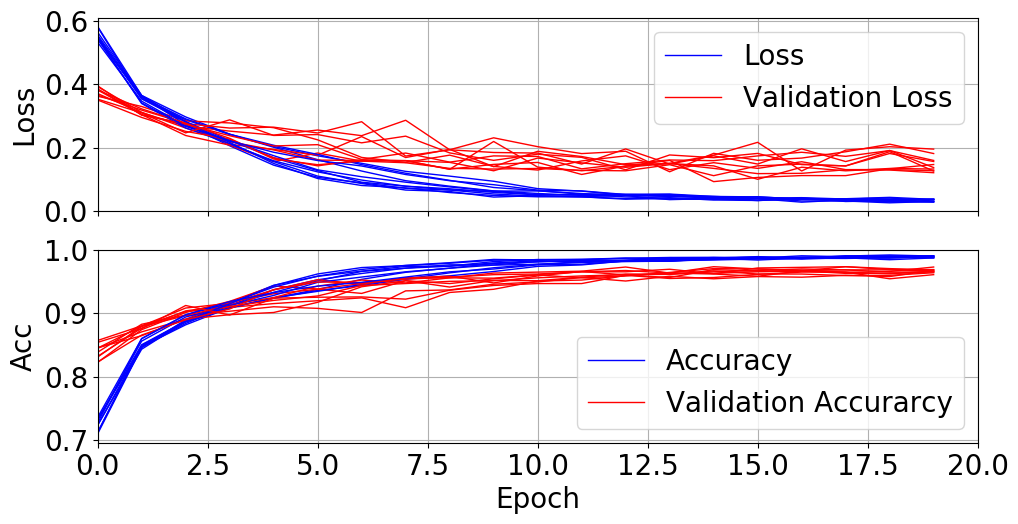

In [59]:
fontsize = 20
plotlossacc(history[0], fontsize)



## ROC curves for 10 interation during k-fold cross validation. Optimal SNR =8

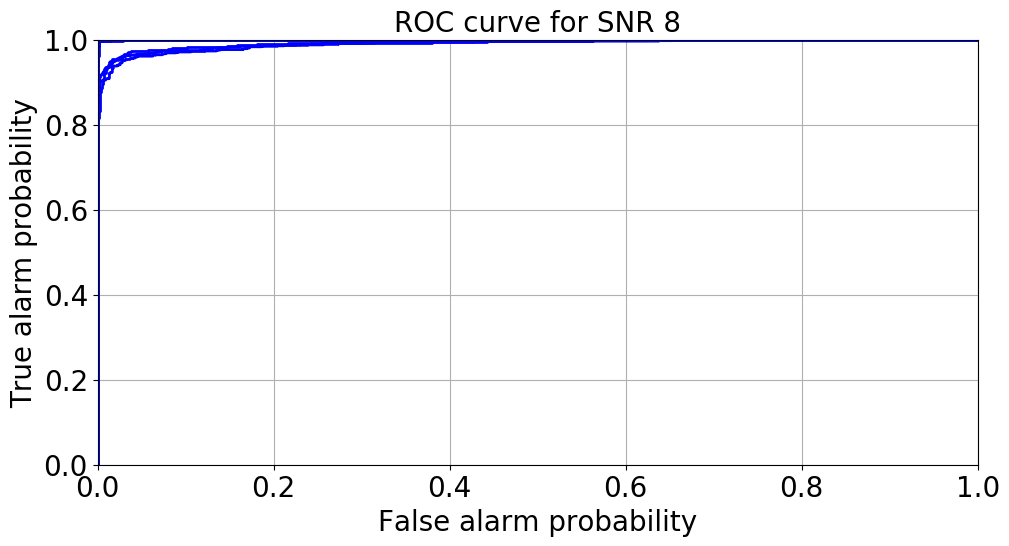

In [60]:

plot_roc(test_label_saver_for_ROC[0], signal_preds[0], 8)


## The tess accuracy and test loss of each of the 10 interation. Optimal SNR =8. And the mean and standard deviation

The mean and the standard of the test accuracy are 0.9863371270759309 and 0.0148069378867461.
 
The mean and the standard of the test loss are 0.0534911961504396 and 0.06339418192778504.


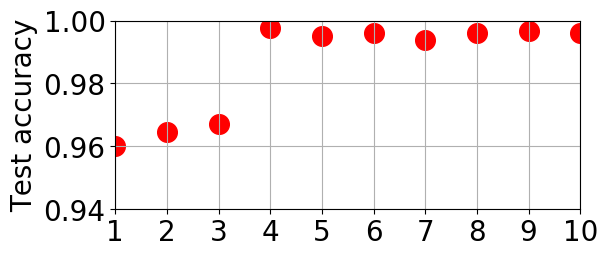

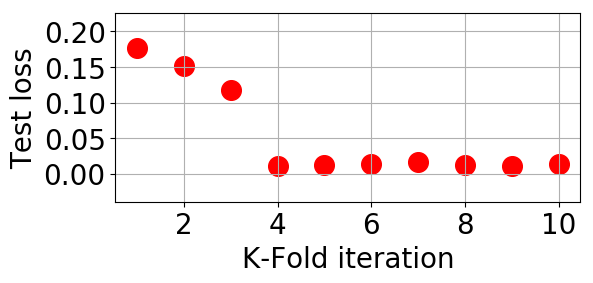

In [61]:
mean_accuracy = np.mean(t_scores[0][:,1])
sd_accuracy = np.std(t_scores[0][:,1])

mean_testloss = np.mean(t_scores[0][:,0])
sd_testloss = np.std(t_scores[0][:,0])
msg = "The mean and the standard of the test accuracy are %s and %s." %(mean_accuracy, sd_accuracy)
print(msg)
print(' ')
msg = "The mean and the standard of the test loss are %s and %s." %(mean_testloss, sd_testloss)
print(msg)
plot_tscores(t_scores[0], fontsize)

## K-Fold cross validation for the network trained on data where the optimal SNR of the signal is 9.0.
## 10 iteration

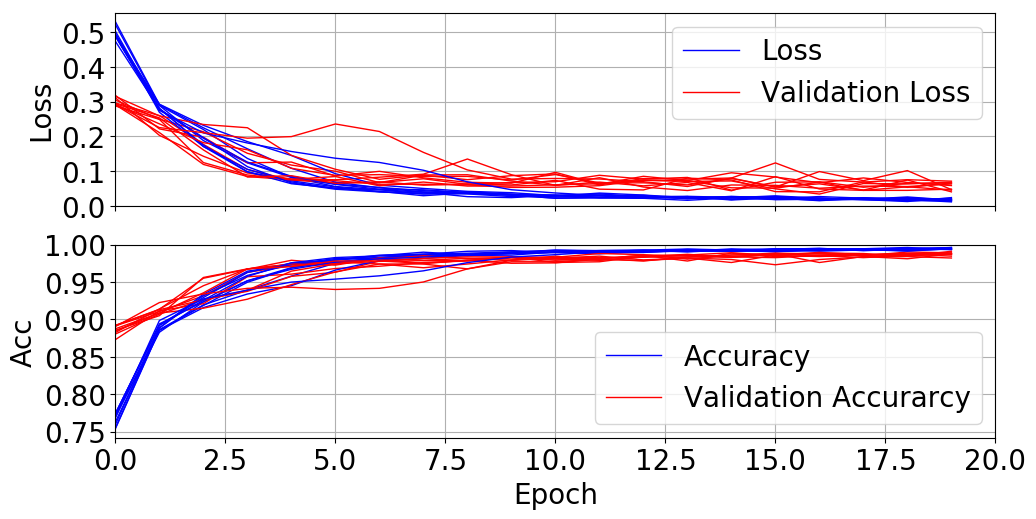

In [62]:
plotlossacc(history[1], fontsize)


## ROC curves for 10 interation during k-fold cross validation. Optimal SNR =9


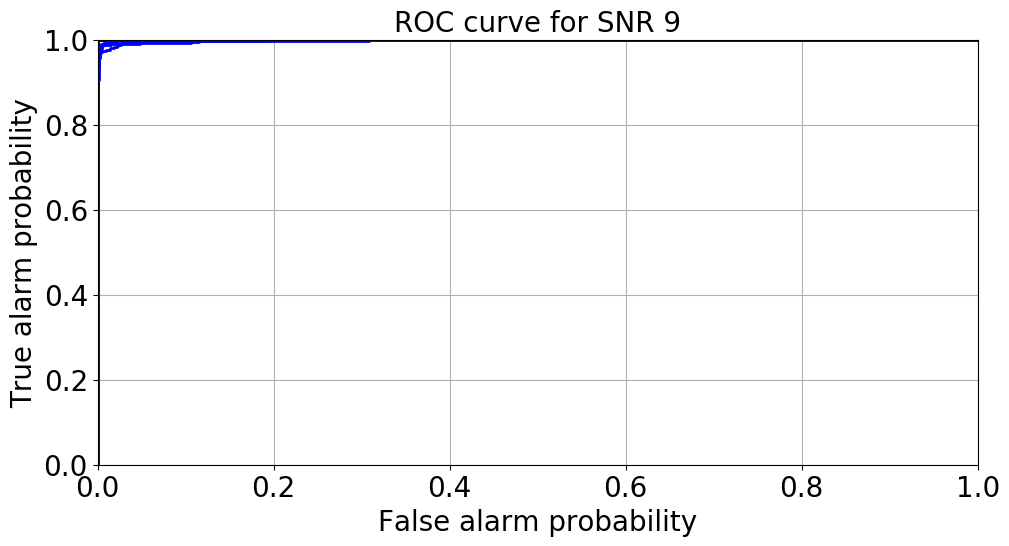

In [63]:
plot_roc(test_label_saver_for_ROC[1], signal_preds[1], 9)

## The tess accuracy and test loss of each of the 10 interation. Optimal SNR =9. And the mean and standard deviation

The mean and the standard of the test accuracy are 0.9948888882716048 and 0.005108393940069097.
 
The mean and the standard of the test loss are 0.02021464219973498 and 0.020999375217864002.


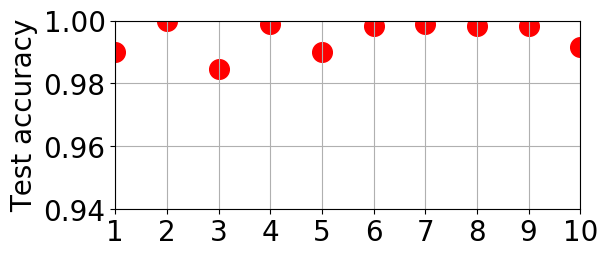

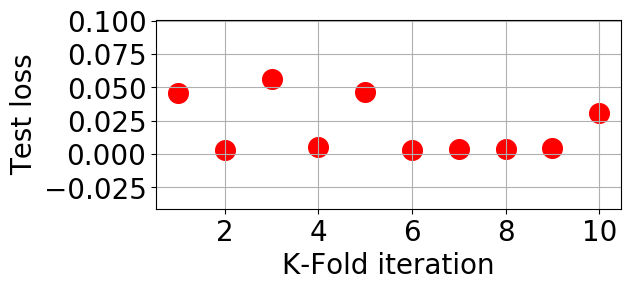

In [53]:
mean_accuracy = np.mean(t_scores[1][:,1])
sd_accuracy = np.std(t_scores[1][:,1])

mean_testloss = np.mean(t_scores[1][:,0])
sd_testloss = np.std(t_scores[1][:,0])
msg = "The mean and the standard of the test accuracy are %s and %s." %(mean_accuracy, sd_accuracy)
print(msg)
print(' ')
msg = "The mean and the standard of the test loss are %s and %s." %(mean_testloss, sd_testloss)
print(msg)
plot_tscores(t_scores[1], fontsize)

## K-Fold cross validation for the network trained on data where the optimal SNR of the signal is 10.0.
## 10 iteration

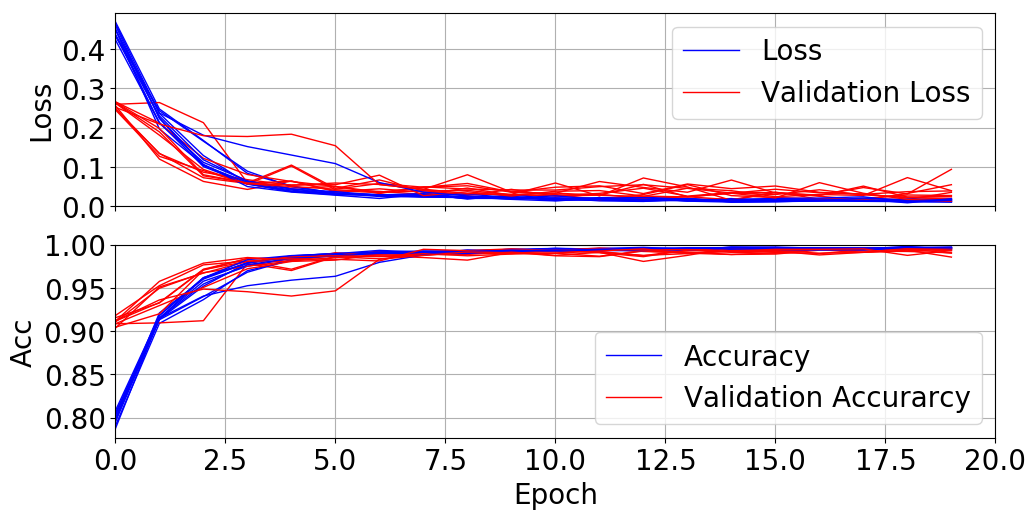

In [65]:
plotlossacc(history[2], fontsize)


## ROC curves for 10 interation during k-fold cross validation. Optimal SNR =10


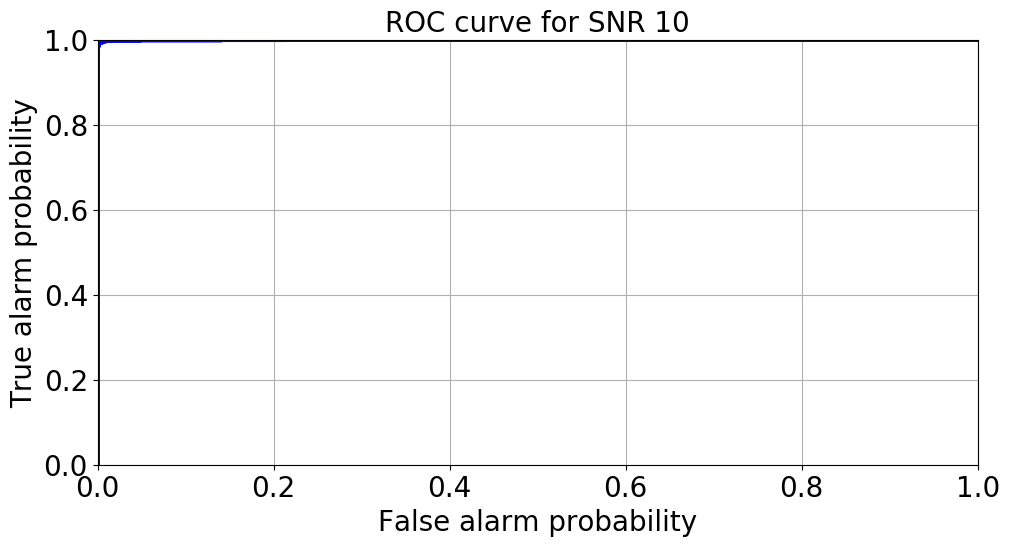

In [67]:
plot_roc(test_label_saver_for_ROC[2], signal_preds[2], 10)

## The tess accuracy and test loss of each of the 10 interation. Optimal SNR =10. And the mean and standard deviation

The mean and the standard of the test accuracy are 0.998278363871923 and 0.0019306211286579727.
 
The mean and the standard of the test loss are 0.007608767296089859 and 0.009582885558318413.


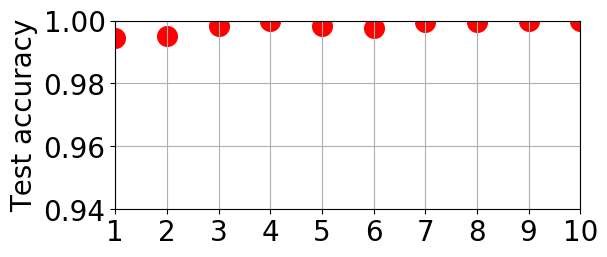

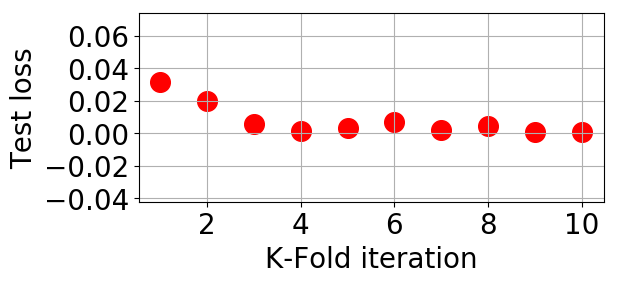

In [52]:
mean_accuracy = np.mean(t_scores[2][:,1])
sd_accuracy = np.std(t_scores[2][:,1])

mean_testloss = np.mean(t_scores[2][:,0])
sd_testloss = np.std(t_scores[2][:,0])
msg = "The mean and the standard of the test accuracy are %s and %s." %(mean_accuracy, sd_accuracy)
print(msg)
print(' ')
msg = "The mean and the standard of the test loss are %s and %s." %(mean_testloss, sd_testloss)
print(msg)
plot_tscores(t_scores[2], fontsize)

In [5]:
def plot_roc(test_label, signal_preds, SNR):
    fig = plt.figure(figsize=(11,5), dpi= 100, facecolor='w', edgecolor='k')

    for i, j in zip(test_label, signal_preds):
        fa, ta, _ = metrics.roc_curve(i[:,1], j[:,1])
        
        plt.plot(fa, ta, linewidth = 2, color = 'b')
        plt.xlabel('False alarm probability',fontsize = fontsize)
        plt.ylabel('True alarm probability',fontsize = fontsize)
        plt.title('ROC curve for SNR %s'%(SNR), fontsize = fontsize)
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.90, top = 0.95)

    plt.grid()
    ax = plt.gca()
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        tick.label1.set_fontweight('normal')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        tick.label1.set_fontweight('normal')
    plt.show()

In [38]:
def plot_tscores(tscores, fontsize):
    ksplit = len(tscores)    
    fig = plt.figure(figsize=(6,2.5), dpi= 100, facecolor='w', edgecolor='k')

    plt.scatter(np.arange(ksplit ) + 1, tscores[:,1], color = 'r', s = 200)
    plt.grid()
    ax = plt.gca()
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        tick.label1.set_fontweight('normal')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        tick.label1.set_fontweight('normal')
    
    plt.xlim([1, ksplit])
    plt.ylim([0.94, 1])

    #plt.xlabel('K-Fold iteration',fontsize = fontsize)
    plt.ylabel('Test accuracy',fontsize = fontsize)

    plt.show()
    fig = plt.figure(figsize=(6,2.5), dpi= 100, facecolor='w', edgecolor='k')

    plt.scatter(np.arange(ksplit ) + 1, tscores[:,0], color = 'r', s = 200)
    plt.grid()
    ax = plt.gca()
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        tick.label1.set_fontweight('normal')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        tick.label1.set_fontweight('normal')
    
    #plt.xlim([bottom = 0])
    #plt.ylim([0.94, 1])

    plt.xlabel('K-Fold iteration',fontsize = fontsize)
    plt.ylabel('Test loss',fontsize = fontsize)

    plt.show()

In [6]:
t_scores = np.array([np.zeros((10, 2)) for i in range(3)])
for i in range(3):
    for j in range(10):
        t_scores[i][j][0] = tscores[i][j][0]
        t_scores[i][j][1] = tscores[i][j][1]

In [ ]:
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_1 (Conv2D)            (None, 8, 1, 13501)       520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 1, 1687)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 1, 1672)       2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 1, 278)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4448)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                142368    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
=================================================================
Total params: 145,018
Trainable params: 145,018
Non-trainable params: 0